# Exploratory Data Analysis
## 13
Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on data analysis.

1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.
5. Create a public repository on your github account titled "machine-learning-course". In it, create a readme file that contains the heading "ECE590: Introductory Machine Learning for Data Science". Add, commit, and push that Jupyter notebook to the master branch. Provide the link to the that post here.

# Exploring Titantic Survival Rates

## 1 & 2 ) Data background
On April 15, 1912, the Titanic collided with an iceberg killing 1502 out of 2224 passengers and crew. Famously, a lack of lifeboats onboard the ship contributed to the strikingly large number of casualties. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others. As depicted in the feature film by Leonardo Dicaprio and Kate Winslet, it is believed that women and children were given priority access to lifeboats and that passengers with lower class tickets were often left behind after all the lifeboats had been allocated. 

The titanic dataset contains data for 891 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person. The following analysis examines the relationships between variables such as gender, age, and ticket class on survival of the Titanic shipwreck and attempts to support or deny the popular views of who survived the sinking. This dataset is available through the seaborn package, but can also be found [here](https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv) and partial codebook can be found through [Kaggle](https://www.kaggle.com/c/titanic/data). Please note that this dataset only contains a subset of the full passenger list, going forward we assume that this subset is representative of the total passenger population.

## 3) Loading and cleaning the dataset 

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Load dataset
titanic = sns.load_dataset('titanic')
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


After loading the dataset, it seems that there are some variables with missing values, variables that need transformation, and potentially some duplicate information. Below we clean, or preprocess the data.

In [30]:
# Clean dataset
# Identify features with missing values
missing_features = titanic.columns[titanic.isnull().any()].tolist()
print('\nFeatures with missing values before preprocessing: ', missing_features) 
print('\nNumber of missing values before preprocessing:\n',titanic.isnull().sum())

# Remove columns with duplicate information
titanic.drop(['embarked','alive'], axis = 1)

# Drop deck for large proportion of missing data
titanic = titanic.drop('deck', axis = 1)

# Impute mean values for age
# This resulted in way too many imputed values and clearly did not fit the distribution
#titanic['age'] = titanic['age'].fillna((titanic['age'].mean()))

# Log transform fare (to account for right skew)
titanic['fare.L'] = np.log(titanic['fare']+(1/8))
titanic['sibsp.L'] = np.log(titanic['sibsp']+(1/8))
titanic['parch.L'] = np.log(titanic['parch']+(1/8))

# Drop remaining rows with missing values
titanic = titanic.dropna(axis = 0)

missing_features = titanic.columns[titanic.isnull().any()].tolist()
print('\nFeatures with missing values after preprocessing: ', missing_features) 
print('\nNumber of missing values after preprocessing:\n',titanic.isnull().sum())


Features with missing values before preprocessing:  ['age', 'embarked', 'deck', 'embark_town']

Number of missing values before preprocessing:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Features with missing values after preprocessing:  []

Number of missing values after preprocessing:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
fare.L         0
sibsp.L        0
parch.L        0
dtype: int64


## 4) Exploring the data

### Feature distributions
After preprocessing the data, we examine simple distributions of the variables as shown below.

From these plots we can see that a majority of observed passengers did not survive the wreckage. Additionally, we see that passengers were more likely to be male than female, and more likely to be third class passengers. We also generally see a large number of passengers embarking from Southampton, paying under 100£ for their fare, traveling alone, and being under 35 years old.

Although several of the continuous variables such as *fare*, *sibsp*, and *parch* are not normally distributed, log transformation do not appear to correct for this. Moving forward we examine these variables on their natural scale.

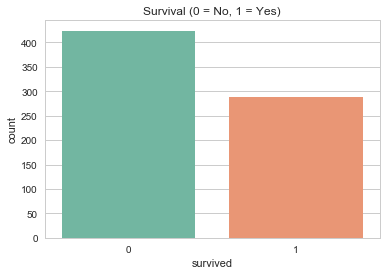

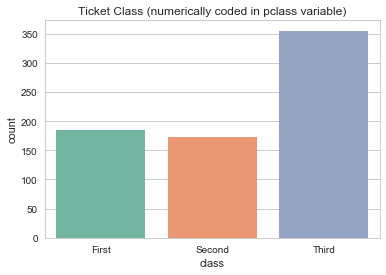

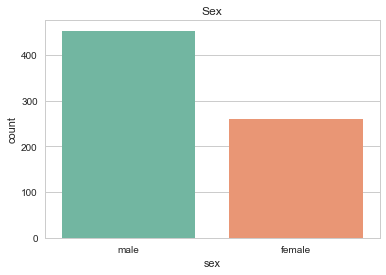

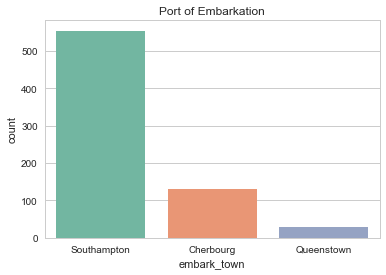

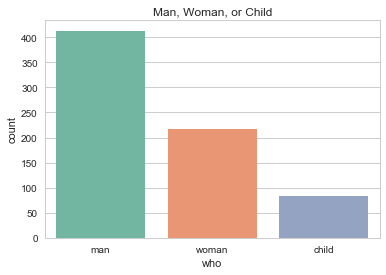

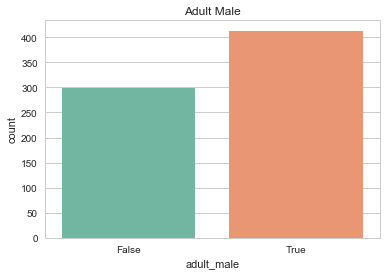

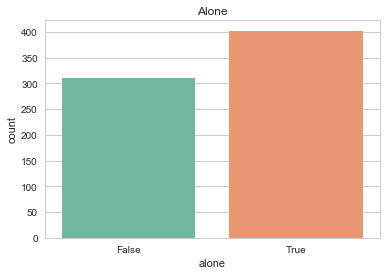

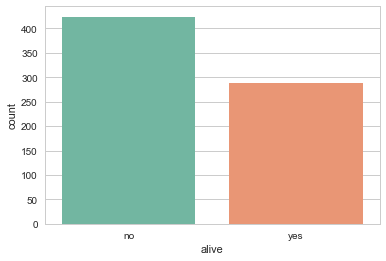

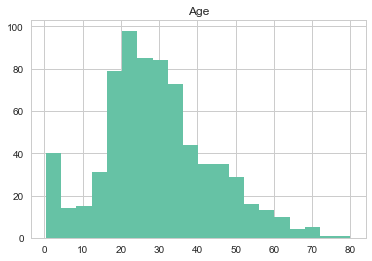

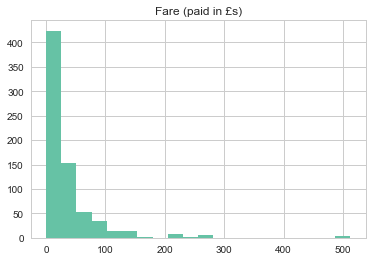

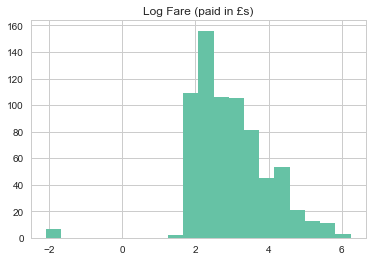

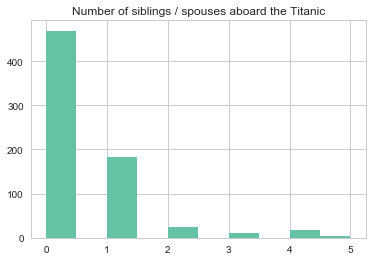

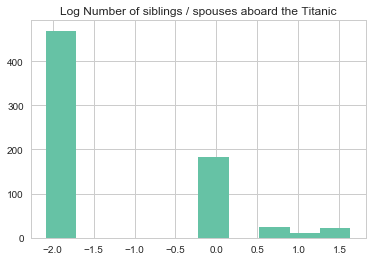

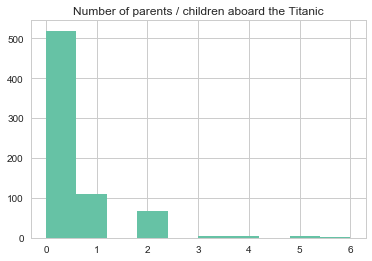

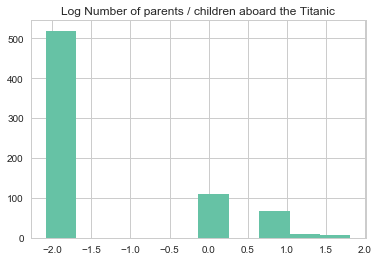

In [31]:
# Distribution Plots
sns.set(style="whitegrid", palette = "Set2")

# Categorical Variables
# Survived
sns.countplot(x = 'survived', data = titanic)
plt.title('Survival (0 = No, 1 = Yes)')
plt.show()
# Class
sns.countplot(x = 'class', data = titanic)
plt.title('Ticket Class (numerically coded in pclass variable)')
plt.show()
# Sex
sns.countplot(x = 'sex', data = titanic)
plt.title('Sex')
plt.show()
# Port of Embarkation
sns.countplot(x = 'embark_town', data = titanic)
plt.title('Port of Embarkation')
plt.show()
# Man, Woman, or Child
sns.countplot(x = 'who', data = titanic)
plt.title('Man, Woman, or Child')
plt.show()
# Adult Male
sns.countplot(x = 'adult_male', data = titanic)
plt.title('Adult Male')
plt.show()
# Alone
sns.countplot(x = 'alone', data = titanic)
plt.title('Alone')
plt.show()
# Alive
sns.countplot(x = 'alive', data = titanic)
plt.show()

# Continuous Variables
# Age
plt.hist(titanic.loc[:,'age'], bins = 20)
plt.title('Age')
plt.show()
# Fare
plt.hist(titanic.loc[:,'fare'], bins = 20)
plt.title('Fare (paid in £s)')
plt.show()
plt.hist(titanic.loc[:,'fare.L'], bins = 20)
plt.title('Log Fare (paid in £s)')
plt.show()
# Number of siblings / spouses
plt.hist(titanic.loc[:,'sibsp'])
plt.title('Number of siblings / spouses aboard the Titanic')
plt.show()
plt.hist(titanic.loc[:,'sibsp.L'])
plt.title('Log Number of siblings / spouses aboard the Titanic')
plt.show()
# Number of parents / children
plt.hist(titanic.loc[:,'parch'])
plt.title('Number of parents / children aboard the Titanic')
plt.show()
plt.hist(titanic.loc[:,'parch.L'])
plt.title('Log Number of parents / children aboard the Titanic')
plt.show()

## Feature relationships with survival

Taking a further look at the data, we now examine the relationships between features and ultimate survival. '

Similar to popular belief, we do in fact see that survival rates improve with ticket class. First class passengers were more likely to survive than second class passengers both of whom where much more likely to survive compared to third class passengers.

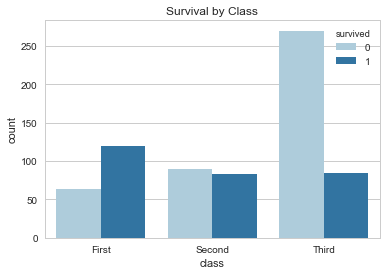

In [32]:
# Further exploration
sns.set(style="whitegrid", palette = "Paired")

# Survival ~ Class
sns.countplot('class', hue = 'survived', data = titanic)
plt.title('Survival by Class')
plt.show()

Looking at survival rates in men, women, and children, we see that women were the most likely to survive, followed by children with men being the least likely to survive.

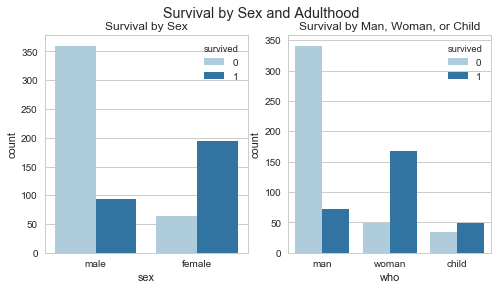

In [33]:
# Survival ~ Sex
fig, axs = plt.subplots(ncols=2)
sns.countplot('sex', hue = 'survived', data = titanic, ax = axs[0])
axs[0].title.set_text('Survival by Sex')
# Survival ~ Who
sns.countplot('who', hue = 'survived', data = titanic, ax = axs[1])
axs[1].title.set_text('Survival by Man, Woman, or Child')
fig.suptitle('Survival by Sex and Adulthood')
fig.set_figwidth(8)
plt.show()

In terms of port of embarkation, our data shows that passengers originating at Southampton were less likely to survive the sinking than other ports. However, we also can see than the majority of passengers embarking from Southampton were third class passengers. Given our working knowledge about how life boats were allocated, it seems more likely that class is a confounding variable in the relationship between port of embarkation and survival and that port of embarkation alone has little relationship with survival rates.

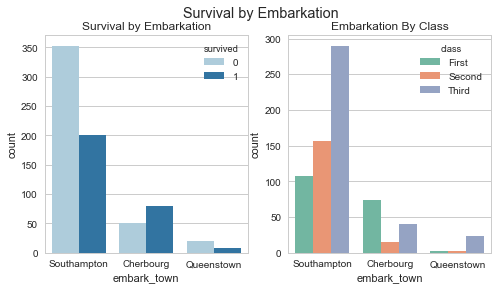

In [34]:
# Survival ~ Embarkation
fig, axs = plt.subplots(ncols=2)
sns.countplot('embark_town', hue = 'survived', data = titanic, ax = axs[0])
axs[0].title.set_text('Survival by Embarkation')
# Embarkation ~ Class
sns.countplot('embark_town', hue = 'class', data = titanic, ax = axs[1], palette = "Set2")
axs[1].title.set_text('Embarkation By Class')
fig.suptitle('Survival by Embarkation')
fig.set_figwidth(8)
plt.show()

Looking at passenger travel companions was traveling with, we first see that traveling alone is associated with lower survival rates. However, it appears that males were much more likely to travel alone compared to women, which is rather unsurprising for the time period. Under similar logic to port of embarkation, it is possible that sex is a confounding variable in the relationship between traveling alone and survival. 

Nevertheless, we see that the relationship is the same between number of siblings / spouses compared to number of parents / children. We see that those traveling alone have the lowest survival rates compared to those traveling with one or more person regardless of relationship.

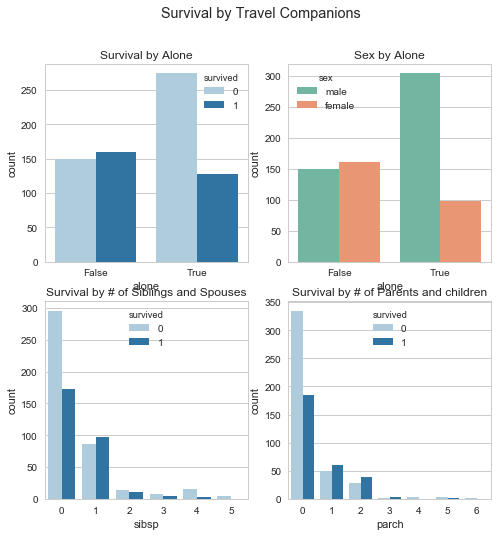

In [35]:
# Survival ~ Travel Companions
# Survival ~ Alone
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.countplot('alone', hue = 'survived', data = titanic, ax = axs[0,0])
axs[0,0].title.set_text('Survival by Alone')
sns.countplot('alone', hue = 'sex', data = titanic, ax = axs[0,1], palette = "Set2")
axs[0,1].title.set_text('Sex by Alone')
# Survival ~ # of Siblings and Spouses
sns.countplot('sibsp', hue = 'survived', data = titanic, ax = axs[1,0])
axs[1,0].title.set_text('Survival by # of Siblings and Spouses')
sns.countplot('parch', hue = 'survived', data = titanic, ax = axs[1,1])
# Survival ~ Survival by # of Parents and children
axs[1,1].title.set_text('Survival by # of Parents and children')
fig.suptitle('Survival by Travel Companions')
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

Thinking about age, there does not appear to be drastic difference in survival rates by age. The one exception appears to be children approximately under the age of 5 that seem to have a higher rate of survival.

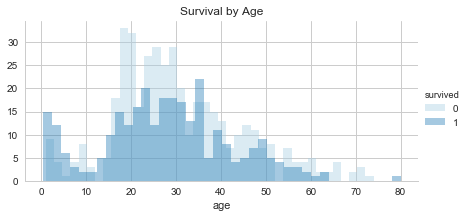

In [36]:
# Continuous Variables
# Survival ~ Age
fg = sns.FacetGrid(titanic, hue="survived", aspect=2, legend_out= True)
fg.map(sns.distplot, "age", kde=False, bins = 40)
fg.add_legend()
plt.title('Survival by Age')
plt.show()

Finally, looking at fare we can see that very low fares is associated with lower survival rates and higher fares being associated with higher rates of survival. Under similar logic as previously described, it is likely that class is a confounding variable in the relationship between fare and survival. Although almost impossible to disentangle, it is very likely that higher-class tickets had a higher fare.

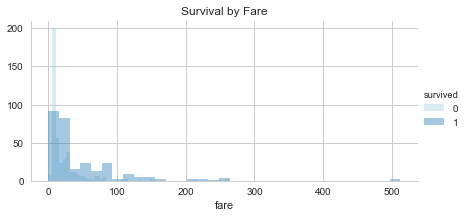

In [37]:
# Survival ~ Fare
fg = sns.FacetGrid(titanic, hue="survived", aspect=2, legend_out= True)
fg.map(sns.distplot, "fare", kde=False)
fg.add_legend()
plt.title('Survival by Fare')
plt.show()

## 5 ) Conclusions

At a high level, our findings support the popular beliefs of who was most likely to survive the infamous Titanic shipwreck. First, we see that, in fact, higher ticket class is associated with higher probability of survival with first class passengers having the highest survival rates. Secondly, we do see that women and children had higher survival rates compared to the survival rates for men. However, it seems that this heightened survival rates only applies to young children under the age of 6-7. 

Further analysis should look at interactions between variables and their relationships to the probability of survival and ultimately should examine feature importance when predicting probability of survival through regression or alternative modeling techniques.